In [133]:
import pandas as pd
import numpy as np
data=pd.read_csv('diabetes2.csv')
data.head()
print(data.shape)

(768, 9)


In [139]:



dt=data.dropna()
print(data.shape)
dt.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1.0


In [140]:
x=dt.drop(['Outcome'],axis=1)

y=dt[['Outcome']]

print(x.shape)
print(y.shape)

(743, 8)
(743, 1)


In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,)

In [149]:

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(6,5),learning_rate_init=0.001)
mlp.fit(x_train,y_train)


C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(6, 5))

In [153]:
from sklearn.metrics import confusion_matrix
pred=mlp.predict(x_test)
cm=confusion_matrix(y_test,pred,labels=[1,0])
print(cm)

[[27 22]
 [17 83]]


C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


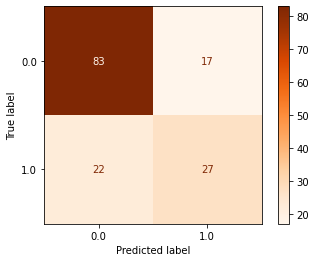

In [154]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp,x_test,y_test,cmap='Oranges')

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


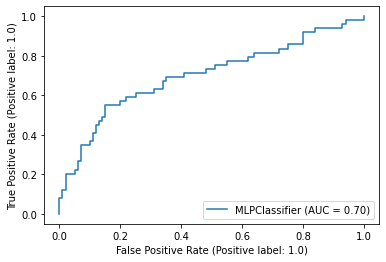

In [155]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(mlp, x_test, y_test) 